In [22]:
#using Pkg
#Pkg.add("Plots")

In [29]:
#Pkg.add("LaTeXStrings")
#Pkg.add("ProgressMeter")
#Pkg.add(PackageSpec(name="JLD2", version= "0.4.25"))
#Pkg.add(PackageSpec(name="DataFrames",version = "1.3.6"))
#Pkg.add("CSV")

   Resolving package versions...


  No Changes to `C:\Users\lukas.eisenmann\Documents\PhD\Code\SCYFI\Project.toml`
  No Changes to `C:\Users\lukas.eisenmann\Documents\PhD\Code\SCYFI\Manifest.toml`


In [1]:

using Plots
using CSV
#using HDF5
using DataFrames
using LaTeXStrings
using JLD2
using ProgressMeter
using SCYFI

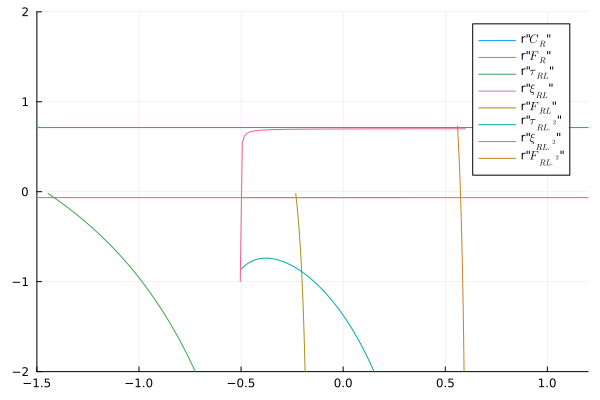

In [2]:
a11 = 0.
a22 = 0.3
a21 = -0.6
a12 = 0.9
w12 = 0.
w21 = -0.94
w11 = -2.
w22 = 0.
h1 = 0.214
h2 = 0.

bl=a21
c=a12
d=a22
br=w21 +a21
al=a11
ar=a11+w11

# define the map


h = [h1, h2] # Define the vector h

# Define matrices for the left and right cases
A_left = [al bl; c d]
A_right = [ar br; c d]

xMin=-1.5
xMax=1.5
yMin=-2
yMax=2
# define analytical curves
#Plot2_005=plot(xlim=(xMin,xMax), ylim=(yMin, yMax))
x=-1.5:0.03:1.5-0.03
Plot2_005=plot()
plot!(Plot2_005,x,(1 .+br*c)./(d)*ones(100).+2,label=r"$C_{R}$")
plot!(Plot2_005,x,(br*c.-d.-1)./(1 .+d)*ones(100).+2,label=r"$F_{R}$")
#println((1 .+br*c)/(d)*ones(100))

x=-4:0.02:-2-0.02
x1=-0.5:0.008:0.3-0.016
x2=-0.504:0.0102:0.6
x3=0.56:0.001:0.6
plot!(Plot2_005,(-bl*c.-br*c.-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1)./(x.-x*d.^2 .+br*c*d),x.+2,label=r"$\tau_{RL}$")
plot!(Plot2_005,x1,(br*c.-1 .-d)./(1 .+d)*ones(99).+2,label=r"$\xi_{RL}$")
plot!(Plot2_005,(-bl*c.-br*c.-d.^2 .-bl*br*c.^2 .+x*bl*c*d.-1)./(x .+x*d.^2 .-br*c*d),x.+2,label=r"$F_{RL}$")


#plot!(Plot2_005,x1,(-br*x1.^2*c*d.^2 .+2*br*x1*bl*c.^2*d.-x1*bl*c.-br*x1*c.-br*bl.^2*c.^3 .-2*bl*c*d.-br*c*d.-d.^3 .+1)./(x1.^2*d.^3 .+x1.^2 .+2*x1*bl*c*d.^2 .-bl.^2*c.^2*d .+bl*c).+2,label=r"$\tau_{RL.^2}$")
plot!(Plot2_005,x1,(br*x1.^2*c*d.^2 .-2*br*x1*bl*c.^2*d.+x1*bl*c.+br*x1*c.+br*bl.^2*c.^3 .+2*bl*c*d.+br*c*d.+d.^3 .-1)./(x1.^2*d.^3 .-x1.^2 .-2*x1*bl*c*d.^2 .+bl.^2*c.^2*d .-bl*c).+2,label=r"$\tau_{RL.^2}$")

plot!(Plot2_005,x2,(-x2.-d.-br*c.-x2*d.-x2*d.^2 .-d.^2 .+bl*c*d.-br*bl*c.^2 .+x2*br*c*d.-1)./(x2 .+x2*d.-bl*c .+x2*d.^2 .-bl*c*d).+2,label=r"$\xi_{RL.^2}$")
plot!(Plot2_005,x3,(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d.-x3*bl*c.-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d.-br*c*d.-d.^3 .-1)./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2,label=r"$F_{RL.^2}$")
plot!(Plot2_005,ylims=(-2,2),xlims=(-1.5,1.2))
#savefig(Plot2_005,"regions_comparison_2.png")

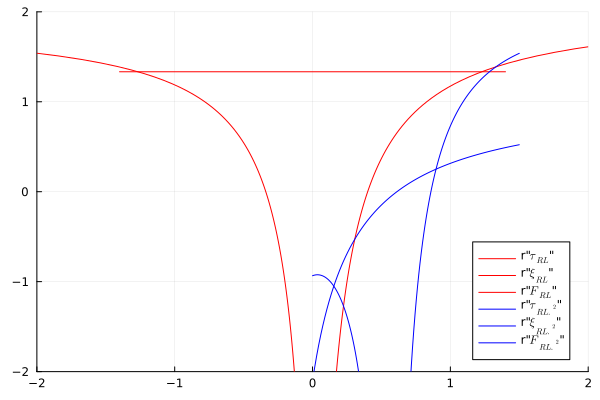

In [3]:
# define parameters of the system
a11 = 0.
a22 = 0.2
a21 = -0.4
a12 = 0.8
w12 = 0.
w21 = 0.9
w11 = -2.
w22 = 0.
h1 = 0.214
h2 = 0.

x2=0:0.015:1.5
x3=0.6:0.009:1.5
bl=a21
c=a12
d=a22
br=w21 +a21



h = [h1, h2] # Define the vector h

# Define matrices for the left and right cases
A_left = [al bl; c d]

A_right = [ar br; c d]
# Generate the time series
#time_series = generate_time_series(z -> step(z, h, A_left, A_right), [1.,1.], num_step)

Plot1_005 = plot()#size=(731,398),xtickfont=font(25),  font_family="sans-serif", ytickfont=font(25),xguidefontsize=32,yguidefontsize=32,legendfont=font(26),margin=7Plots.mm)


# define analytical curves
#Plot1_005=plot(xlim=(xMin,xMax), ylim=(yMin, yMax))

# define analytical curves
#tau = a_l\ a_r  .+ b_l c  .+ b_r c  .+ d.^2  .- a_l\ a_r d.^2  .- b_l\ b_r c.^2  .+ a_l b_r  c d  .+ a_r b_l c d  .-1 =0 
#xi_1 = a_l  .+ d  .+ a_l\ d  .- b_l\ c  .+ 1 = 0
#F = a_l\, a_r  .+ b_l \,c  .+ b_r\,c  .+ d.^2  .+ a_l\,a_r\,d.^2  .+ b_l\,b_r\,c.^2  .-  a_l\,b_r\,c\,d  .- a_r\,b_l\,c\,d  .+ 1=0
x= -4:0.039:-0.1
x1= -1.4:0.028:1.4#-0.028
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1) ./(x .-x*d.^2 .+br*c*d),x.+2,label=r"$\tau_{RL}$",color="red")
plot!(Plot1_005,x1,(br*c .-1 .-d) ./(1 .+d)*ones(101).+2,label=r"$\xi_{RL}$",color="red")
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .-bl*br*c.^2 .+x*bl*c*d .-1) ./(x .+x*d.^2 .-br*c*d),x.+2,label=r"$F_{RL}$",color="red")#,linestyle="dashed")
x1=0:0.005:0.5
#plot!(Plot1_005,x1,(-br*x1.^2*c*d.^2 .+2*br*x1*bl*c.^2*d .-x1*bl*c .-br*x1*c .-br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .+1) ./(x1.^2*d.^3 .+x1.^2 .+2*x1*bl*c*d.^2 .-bl.^2*c.^2*d .+bl*c).+2,label=r"$\tau_{RL.^2}$",color="green")
plot!(Plot1_005,x1,(br*x1.^2*c*d.^2 .-2*br*x1*bl*c.^2*d.+x1*bl*c.+br*x1*c.+br*bl.^2*c.^3 .+2*bl*c*d.+br*c*d.+d.^3 .-1)./(x1.^2*d.^3 .-x1.^2 .-2*x1*bl*c*d.^2 .+bl.^2*c.^2*d .-bl*c).+2,label=r"$\tau_{RL.^2}$",color="blue")

plot!(Plot1_005,x2,( .-x2 .-d .-br*c .-x2*d .-x2*d.^2 .-d.^2 .+bl*c*d .-br*bl*c.^2 .+x2*br*c*d .-1) ./(x2 .+x2*d .-bl*c .+x2*d.^2 .-bl*c*d).+2,label=r"$\xi_{RL.^2}$",color="blue")
plot!(Plot1_005,x3,(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d .-x3*bl*c .-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .-1) ./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2,label=r"$F_{RL.^2}$",color="blue")#,linestyle="dashed")
plot!(Plot1_005,ylims=(-2,2),xlims=(-2,2))
#savefig(Plot1_005,"regions_comparison_1.png")

In [4]:
# define parameters of the system
a11 = 0.
a22 = 0.2
a21 = -0.4
a12 = 0.8
w12 = 0.
w21 = 0.9
w11 = -2.
w22 = 0.
h1 = 0.214
h2 = 0.

0.0

┌ Warning: the following fields are present in type DataFrame saved in the file but not present in the type the workspace:
│ 
│ metadata
│ colmetadata
│ allnotemetadata,
│ 
│ Data in these fields will not be accessible
└ @ JLD2 C:\Users\lukas.eisenmann\.julia\packages\JLD2\HnW0g\src\data\reconstructing_datatypes.jl:208


Progress:   0%|█                                        |  ETA: 4:21:18

Progress:  62%|██████████████████████████               |  ETA: 0:00:01

Progress:  68%|█████████████████████████████            |  ETA: 0:00:02

Progress:  70%|█████████████████████████████            |  ETA: 0:00:01

Progress:  71%|██████████████████████████████           |  ETA: 0:00:01

Progress:  72%|██████████████████████████████           |  ETA: 0:00:01

Progress:  74%|███████████████████████████████          |  ETA: 0:00:01

Progress:  75%|███████████████████████████████          |  ETA: 0:00:01

Progress:  76%|████████████████████████████████         |  ETA: 0:00:01

Progress:  77%|████████████████████████████████         |  ETA: 0:00:01

Progress:  79%|█████████████████████████████████        |  ETA: 0:00:01

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:01

Progress:  81%|██████████████████████████████████       |  ETA: 0:00:01

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:01

Progress:  84%|███████████████████████████████████      |  ETA: 0:00:01

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:01

Progress:  86%|████████████████████████████████████     |  ETA: 0:00:01

Progress:  86%|████████████████████████████████████     |  ETA: 0:00:01

Progress:  87%|████████████████████████████████████     |  ETA: 0:00:01

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:01

Progress:  89%|█████████████████████████████████████    |  ETA: 0:00:01

Progress:  89%|█████████████████████████████████████    |  ETA: 0:00:01

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:01

Progress:  91%|██████████████████████████████████████   |  ETA: 0:00:01

Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:01

Progress:  92%|██████████████████████████████████████   |  ETA: 0:00:01

Progress:  93%|███████████████████████████████████████  |  ETA: 0:00:01

Progress:  94%|███████████████████████████████████████  |  ETA: 0:00:00

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:00

Progress:  95%|████████████████████████████████████████ |  ETA: 0:00:00

Progress:  96%|████████████████████████████████████████ |  ETA: 0:00:00

Progress:  97%|████████████████████████████████████████ |  ETA: 0:00:00

Progress:  98%|█████████████████████████████████████████|  ETA: 0:00:00

Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:00

Progress:  99%|█████████████████████████████████████████|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08

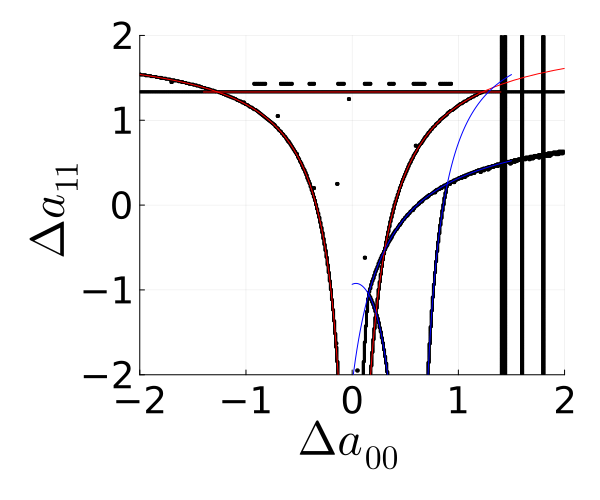

In [5]:
"""
Find the bifurcations on a 2D parameter grid
"""
function find_bifurcations_parameter_grid(df::DataFrame)
    # go through every row and draw a line between grid points if either number or stability of 
    # objects changes
    grid_length = Integer(sqrt(size(df,1)))
    dy = abs(df[1+grid_length,"grid_coordinates"][1]-df[1,"grid_coordinates"][1])
    dx = abs(df[2,"grid_coordinates"][2]-df[1,"grid_coordinates"][2])

    ddx = dx/10
    ddy = dy/10
    P=Plots.plot(size=(600,500),xtickfont=font(25),colorbar=true, legend = false,  font_family="sans-serif", ytickfont=font(25),xguidefontsize=32,yguidefontsize=32,legendfont=font(26),margin=7Plots.mm)
   
    prog = Progress(nrow(df))
    for i = 1:nrow(df)
        #println(i)
        #display(P)
        if mod(i,grid_length)!=0
            if length.(df[i,"cycles"])!=length.(df[i+1,"cycles"])
                Plots.plot!(P,df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2,ones(length(df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2))*(df[i,"grid_coordinates"][2]+dx/2),legend=false,color="black",linewidth=3)
            else
                for n in eachindex(df[1,"cycles"])
                    same_stability_indices_found = []
                    for j in eachindex(df[i,"cycles"][n])
                        same_stability_indices = compare_stability(df[i,"eigvals"][n][j],df[i+1,"eigvals"][n])
                        # no match in stability means a bifurcation occured
                        if same_stability_indices === nothing
                            Plots.plot!(P,df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2,ones(length(df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2))*(df[i,"grid_coordinates"][2]+dx/2),legend=false,color="black",linewidth=3)
                            break
                        else
                            # if the cycle with same stability is also closest in state space -> no bifurcation
                            if length(same_stability_indices) == 1
                                #distance_cycles = get_minimal_state_space_distances(df[i,"cycles"][n][j],df[i+1,"cycles"][n])
                                #index_min = argmin(distance_cycles)
                                #if index_min != same_stability_indices[1] || same_stability_indices[1] in same_stability_indices_found
                                if same_stability_indices[1] in same_stability_indices_found
                                    Plots.plot!(P,df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2,ones(length(df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2))*(df[i,"grid_coordinates"][2]+dx/2),legend=false,color="black",linewidth=3)
                                else
                                    append!(same_stability_indices_found, same_stability_indices)
                                end
                            else
                                distance_cycles = get_combined_state_space_eigenvalue_distance(df[i,"cycles"][n][j],df[i+1,"cycles"][n], df[i,"eigvals"][n][j],df[i+1,"eigvals"][n])
                                index_min = argmin(distance_cycles)
                                if index_min in same_stability_indices_found
                                    Plots.plot!(P,df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2,ones(length(df[i,"grid_coordinates"][1]-dy/2:ddy:df[i,"grid_coordinates"][1]+dy/2))*(df[i,"grid_coordinates"][2]+dx/2),legend=false,color="black",linewidth=3)
                                else
                                    append!(same_stability_indices_found, index_min)
                                end
                            end
                        end
                    end
                end
            end
        end
        if i < size(df,1)-grid_length
            if length.(df[i,"cycles"])!=length.(df[i+grid_length,"cycles"])
                Plots.plot!(P,ones(length(df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2))*(df[i,"grid_coordinates"][1]+dy/2),df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2,legend=false,color="black",linewidth=3)
            else
                for n in eachindex(df[1,"cycles"])
                    same_stability_indices_found = []
                    for j in eachindex(df[i,"cycles"][n])
                        same_stability_indices = compare_stability(df[i,"eigvals"][n][j],df[i+grid_length,"eigvals"][n])
                        # no match in stability means a bifurcation occured
                        if same_stability_indices === nothing
                            Plots.plot!(P,ones(length(df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2))*(df[i,"grid_coordinates"][1]+dy/2),df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2,legend=false,color="black",linewidth=3)
                            break
                        else
                            # if the cycle with same stability is also closest in state space -> no bifurcation
                            if length(same_stability_indices) == 1
                                #distance_cycles = get_minimal_state_space_distances(df[i,"cycles"][n][j],df[i+grid_length,"cycles"][n])
                               # index_min = argmin(distance_cycles)
                                #if index_min != same_stability_indices[1] || same_stability_indices[1] in same_stability_indices_found
                                if same_stability_indices[1] in same_stability_indices_found
                                    Plots.plot!(P,ones(length(df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2))*(df[i,"grid_coordinates"][1]+dy/2),df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2,legend=false,color="black",linewidth=3)
                                else
                                    append!(same_stability_indices_found, same_stability_indices)
                                end
                            else
                                distance_cycles = get_combined_state_space_eigenvalue_distance(df[i,"cycles"][n][j],df[i+grid_length,"cycles"][n], df[i,"eigvals"][n][j],df[i+grid_length,"eigvals"][n])
                                index_min = argmin(distance_cycles)
                                if index_min in same_stability_indices_found
                                    Plots.plot!(P,ones(length(df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2))*(df[i,"grid_coordinates"][1]+dy/2),df[i,"grid_coordinates"][2]-dx/2:ddx:df[i,"grid_coordinates"][2]+dx/2,legend=false,color="black",linewidth=3)
                                else
                                    append!(same_stability_indices_found, index_min)
                                end
                            end
                        end
                    end 
                end
            end
        end
        next!(prog)
    end
    xlabel!(L"\Delta a_{00}")
    ylabel!(L"\Delta a_{11}")
    a11 = 0.
    a22 = 0.2
    a21 = -0.4
    a12 = 0.8
    w12 = 0.
    w21 = 0.9
    w11 = -2.
    w22 = 0.
    h1 = 0.214
    h2 = 0.

    x2=0:0.015:1.5
    x3=0.6:0.009:1.5
    bl=a21
    c=a12
    d=a22
    br=w21 +a21
    x= -4:0.039:-0.1
    x1= -1.4:0.028:1.4#-0.028
    plot!(P,( .-bl*c .-br*c .-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1) ./(x .-x*d.^2 .+br*c*d),x.+2,label=r"$\tau_{RL}$",color="red")
    plot!(P,x1,(br*c .-1 .-d) ./(1 .+d)*ones(101).+2,label=r"$\xi_{RL}$",color="red")
    plot!(P,( .-bl*c .-br*c .-d.^2 .-bl*br*c.^2 .+x*bl*c*d .-1) ./(x .+x*d.^2 .-br*c*d),x.+2,label=r"$F_{RL}$",color="red")#,linestyle="dashed")
    x1=0:0.005:0.5
    #plot!(Plot1_005,x1,(-br*x1.^2*c*d.^2 .+2*br*x1*bl*c.^2*d .-x1*bl*c .-br*x1*c .-br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .+1) ./(x1.^2*d.^3 .+x1.^2 .+2*x1*bl*c*d.^2 .-bl.^2*c.^2*d .+bl*c).+2,label=r"$\tau_{RL.^2}$",color="green")
    plot!(P,x1,(br*x1.^2*c*d.^2 .-2*br*x1*bl*c.^2*d.+x1*bl*c.+br*x1*c.+br*bl.^2*c.^3 .+2*bl*c*d.+br*c*d.+d.^3 .-1)./(x1.^2*d.^3 .-x1.^2 .-2*x1*bl*c*d.^2 .+bl.^2*c.^2*d .-bl*c).+2,label=r"$\tau_{RL.^2}$",color="blue")

    plot!(P,x2,( .-x2 .-d .-br*c .-x2*d .-x2*d.^2 .-d.^2 .+bl*c*d .-br*bl*c.^2 .+x2*br*c*d .-1) ./(x2 .+x2*d .-bl*c .+x2*d.^2 .-bl*c*d).+2,label=r"$\xi_{RL.^2}$",color="blue",xlims=(-2,2),ylims=(-2,2))
    plot!(P,x3,(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d .-x3*bl*c .-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .-1) ./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2,label=r"$F_{RL.^2}$",color="blue")#,linestyle="dashed")

    return P
end


data = load("system_001_res_new.jld2","data")
find_bifurcations_parameter_grid(data)


In [7]:

function step(z_prev::Vector, h::Vector, A_left::Matrix, A_right::Matrix) 
    z1_t_1, z2_t_1 = z_prev

    # Check the condition for the left or right transformation
    if z1_t_1 ≤ 0
        z_t = A_left * z_prev + h
    else
        z_t = A_right * z_prev + h
    end

    return z_t
end


function generate_time_series(step::Function, z_init::Vector, num_steps::Integer) 
    time_series = Vector{Vector}(undef, num_steps)
    time_series[1] = z_init

    for t in 2:num_steps
        time_series[t] = step(time_series[t - 1])
    end

    return time_series
end

# Generate the time series
#time_series = generate_time_series(z -> step(z, h, A_left, A_right), z_init, num_steps)

generate_time_series (generic function with 1 method)

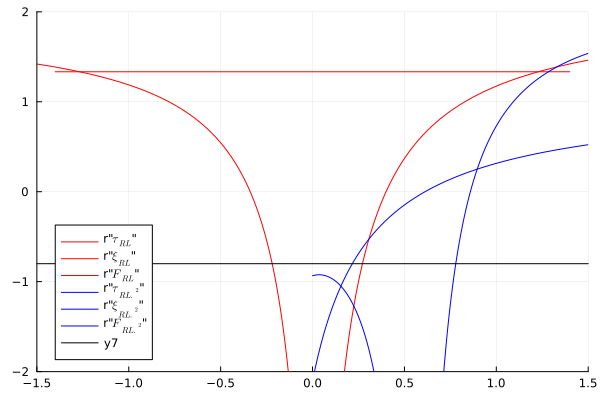

In [8]:
using Distributions
# define parameters of the system
a11 = 0.
a22 = 0.2
a21 = -0.4
a12 = 0.8
w12 = 0.
w21 = 0.9
w11 = -2.
w22 = 0.
h1 = 0.214
h2 = 0.

x2=0:0.015:1.5
x3=0.6:0.009:1.5
bl=a21
c=a12
d=a22
br=w21 +a21



h = [h1, h2] # Define the vector h

# Define matrices for the left and right cases
#A_left = [al bl; c d]

#A_right = [ar br; c d]
# Generate the time series
#time_series = generate_time_series(z -> step(z, h, A_left, A_right), [1.,1.], num_step)

Plot1_005 = plot()#size=(731,398),xtickfont=font(25),  font_family="sans-serif", ytickfont=font(25),xguidefontsize=32,yguidefontsize=32,legendfont=font(26),margin=7Plots.mm)


# define analytical curves
#Plot1_005=plot(xlim=(xMin,xMax), ylim=(yMin, yMax))

# define analytical curves
#tau = a_l\ a_r  .+ b_l c  .+ b_r c  .+ d.^2  .- a_l\ a_r d.^2  .- b_l\ b_r c.^2  .+ a_l b_r  c d  .+ a_r b_l c d  .-1 =0 
#xi_1 = a_l  .+ d  .+ a_l\ d  .- b_l\ c  .+ 1 = 0
#F = a_l\, a_r  .+ b_l \,c  .+ b_r\,c  .+ d.^2  .+ a_l\,a_r\,d.^2  .+ b_l\,b_r\,c.^2  .-  a_l\,b_r\,c\,d  .- a_r\,b_l\,c\,d  .+ 1=0
x= -4:0.039:-0.1
x1= -1.4:0.028:1.4#-0.028
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1) ./(x .-x*d.^2 .+br*c*d),x.+2,label=r"$\tau_{RL}$",color="red")
plot!(Plot1_005,x1,(br*c .-1 .-d) ./(1 .+d)*ones(101).+2,label=r"$\xi_{RL}$",color="red")
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .-bl*br*c.^2 .+x*bl*c*d .-1) ./(x .+x*d.^2 .-br*c*d),x.+2,label=r"$F_{RL}$",color="red")#,linestyle="dashed")
x1=0:0.005:0.5
#plot!(Plot1_005,x1,(-br*x1.^2*c*d.^2 .+2*br*x1*bl*c.^2*d .-x1*bl*c .-br*x1*c .-br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .+1) ./(x1.^2*d.^3 .+x1.^2 .+2*x1*bl*c*d.^2 .-bl.^2*c.^2*d .+bl*c).+2,label=r"$\tau_{RL.^2}$",color="green")
plot!(Plot1_005,x1,(br*x1.^2*c*d.^2 .-2*br*x1*bl*c.^2*d.+x1*bl*c.+br*x1*c.+br*bl.^2*c.^3 .+2*bl*c*d.+br*c*d.+d.^3 .-1)./(x1.^2*d.^3 .-x1.^2 .-2*x1*bl*c*d.^2 .+bl.^2*c.^2*d .-bl*c).+2,label=r"$\tau_{RL.^2}$",color="blue")

plot!(Plot1_005,x2,( .-x2 .-d .-br*c .-x2*d .-x2*d.^2 .-d.^2 .+bl*c*d .-br*bl*c.^2 .+x2*br*c*d .-1) ./(x2 .+x2*d .-bl*c .+x2*d.^2 .-bl*c*d).+2,label=r"$\xi_{RL.^2}$",color="blue")
plot!(Plot1_005,x3,(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d .-x3*bl*c .-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .-1) ./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2,label=r"$F_{RL.^2}$",color="blue")#,linestyle="dashed")
plot!(Plot1_005,ylims=(-2,2),xlims=(-1.5,1.5))
plot!(Plot1_005,-1.5:0.2:1.5,ones(length(-1.5:0.2:1.5)).*-0.8,xlims=(-1.5,1.5),color="black")
#savefig(Plot1_005,"regions_comparison_1.png")

### Remove higher order stuff for bifurcations we do not look at

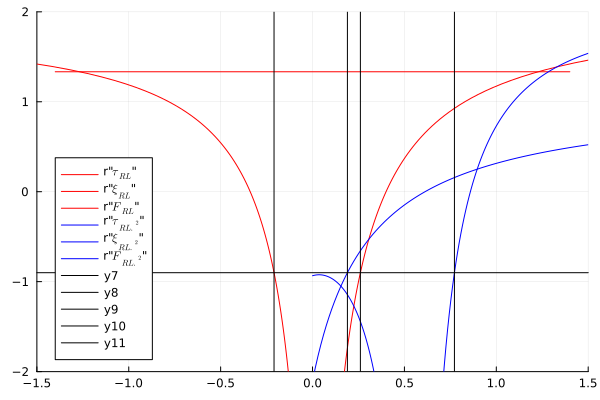

In [9]:
using Distributions
# define parameters of the system
a11 = 0.
a22 = 0.2
a21 = -0.4
a12 = 0.8
w12 = 0.
w21 = 0.9
w11 = -2.
w22 = 0.
h1 = 0.214
h2 = 0.

x2=0:0.015:1.5
x3=0.6:0.009:1.5
bl=a21
c=a12
d=a22
br=w21 +a21



h = [h1, h2] # Define the vector h

# Define matrices for the left and right cases
#A_left = [al bl; c d]

#A_right = [ar br; c d]
# Generate the time series
#time_series = generate_time_series(z -> step(z, h, A_left, A_right), [1.,1.], num_step)

Plot1_005 = plot()#size=(731,398),xtickfont=font(25),  font_family="sans-serif", ytickfont=font(25),xguidefontsize=32,yguidefontsize=32,legendfont=font(26),margin=7Plots.mm)


# define analytical curves
#Plot1_005=plot(xlim=(xMin,xMax), ylim=(yMin, yMax))

# define analytical curves
#tau = a_l\ a_r  .+ b_l c  .+ b_r c  .+ d.^2  .- a_l\ a_r d.^2  .- b_l\ b_r c.^2  .+ a_l b_r  c d  .+ a_r b_l c d  .-1 =0 
#xi_1 = a_l  .+ d  .+ a_l\ d  .- b_l\ c  .+ 1 = 0
#F = a_l\, a_r  .+ b_l \,c  .+ b_r\,c  .+ d.^2  .+ a_l\,a_r\,d.^2  .+ b_l\,b_r\,c.^2  .-  a_l\,b_r\,c\,d  .- a_r\,b_l\,c\,d  .+ 1=0
x= -4:0.039:-0.1
x1= -1.4:0.028:1.4#-0.028
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1) ./(x .-x*d.^2 .+br*c*d),x.+2,label=r"$\tau_{RL}$",color="red")
plot!(Plot1_005,x1,(br*c .-1 .-d) ./(1 .+d)*ones(101).+2,label=r"$\xi_{RL}$",color="red")
plot!(Plot1_005,( .-bl*c .-br*c .-d.^2 .-bl*br*c.^2 .+x*bl*c*d .-1) ./(x .+x*d.^2 .-br*c*d),x.+2,label=r"$F_{RL}$",color="red")#,linestyle="dashed")
x1=0:0.005:0.5
#plot!(Plot1_005,x1,(-br*x1.^2*c*d.^2 .+2*br*x1*bl*c.^2*d .-x1*bl*c .-br*x1*c .-br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .+1) ./(x1.^2*d.^3 .+x1.^2 .+2*x1*bl*c*d.^2 .-bl.^2*c.^2*d .+bl*c).+2,label=r"$\tau_{RL.^2}$",color="green")
plot!(Plot1_005,x1,(br*x1.^2*c*d.^2 .-2*br*x1*bl*c.^2*d.+x1*bl*c.+br*x1*c.+br*bl.^2*c.^3 .+2*bl*c*d.+br*c*d.+d.^3 .-1)./(x1.^2*d.^3 .-x1.^2 .-2*x1*bl*c*d.^2 .+bl.^2*c.^2*d .-bl*c).+2,label=r"$\tau_{RL.^2}$",color="blue")

plot!(Plot1_005,x2,( .-x2 .-d .-br*c .-x2*d .-x2*d.^2 .-d.^2 .+bl*c*d .-br*bl*c.^2 .+x2*br*c*d .-1) ./(x2 .+x2*d .-bl*c .+x2*d.^2 .-bl*c*d).+2,label=r"$\xi_{RL.^2}$",color="blue")
plot!(Plot1_005,x3,(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d .-x3*bl*c .-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .-1) ./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2,label=r"$F_{RL.^2}$",color="blue")#,linestyle="dashed")
plot!(Plot1_005,ylims=(-2,2),xlims=(-1.5,1.5))
plot!(Plot1_005,-1.5:0.2:1.5,ones(length(-1.5:0.2:1.5)).*-0.9,xlims=(-1.5,1.5),color="black")

plot!(Plot1_005,ones(length(-2:0.2:2)).*0.2604,-2:0.2:2,xlims=(-1.5,1.5),color="black")
plot!(Plot1_005,ones(length(-2:0.2:2)).*0.77216,-2:0.2:2,xlims=(-1.5,1.5),color="black")
plot!(Plot1_005,ones(length(-2:0.2:2)).*0.1898,-2:0.2:2,xlims=(-1.5,1.5),color="black")
plot!(Plot1_005,ones(length(-2:0.2:2)).*-0.2094674,-2:0.2:2,xlims=(-1.5,1.5),color="black")

#savefig(Plot1_005,"regions_comparison_1.png")



In [10]:
x=-2.9
println("al for flip bifurcation",(.-bl*c .-br*c .-d.^2 .-bl*br*c.^2 .+x*bl*c*d .-1) ./(x .+x*d.^2 .-br*c*d))
println("al for border bifurcation",( .-bl*c .-br*c .-d.^2 .+bl*br*c.^2 .-x*bl*c*d .+1) ./(x .-x*d.^2 .+br*c*d))

x3=0.77216
println("al for second flip ",(br*x3.^2*c*d.^2 .-2*br*x3*bl*c.^2*d .-x3*bl*c .-br*x3*c .+br*bl.^2*c.^3 .-2*bl*c*d .-br*c*d .-d.^3 .-1) ./(x3.^2*d.^3 .+x3.^2 .-2*x3*bl*c*d.^2 .+bl.^2*c.^2*d .+bl*c).+2)

x2=0.1899
println("al for second flip ",( .-x2 .-d .-br*c .-x2*d .-x2*d.^2 .-d.^2 .+bl*c*d .-br*bl*c.^2 .+x2*br*c*d .-1) ./(x2 .+x2*d .-bl*c .+x2*d.^2 .-bl*c*d).+2)

#check what happens after 3 cycle DFB
# A_left = [1. a12; a21 a22]#
# f=plot()
# for init=1:10
#     time_series = generate_time_series(z -> step(z, h, A_left, A_right),  rand(Uniform(-2,2),2),100000)
#     plot!(f,1:length(time_series[end-20:end]),[vec[1] for vec in time_series[end-20:end]],marker=:dot)
#     traj= time_series[end-10:end]
#     points= length(unique(round.([vec[1] for vec in traj],digits=3)))
#     println(points)
#     println(time_series[end-10:end,1])
# end
# display(f)

al for flip bifurcation

0.26046511627906976
al for border bifurcation-0.2094674556213018


al for second flip -0.90036950116682


al for second flip -0.8996829578547021


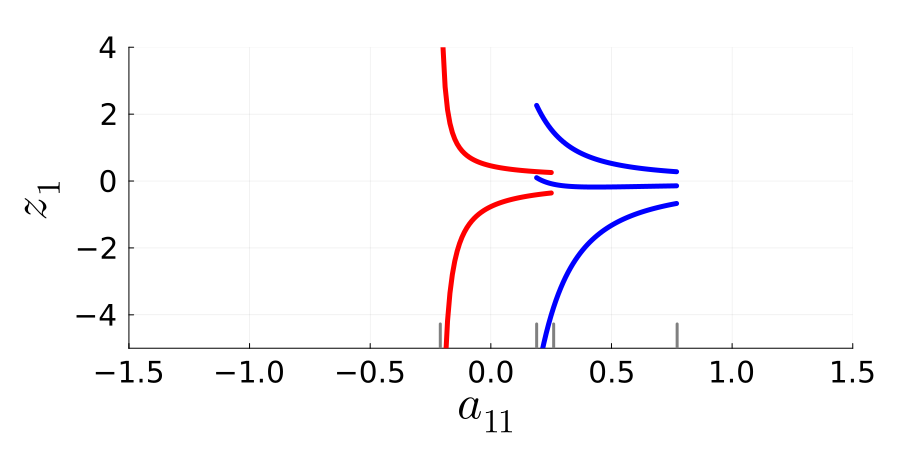

In [11]:
hi=plot(ylims=(-4,4),xlims=(-1.5,1.5),margin=10Plots.mm,size=(900,450),legend=false,xlabel=L"a_{11}",ylabel=L"z_1",xtickfont=font(20),colorbar=true,  font_family="sans-serif", ytickfont=font(20),xguidefontsize=32,yguidefontsize=32,legendfont=font(26))
plot!(hi,ones(length(-5:0.4:-4)).*0.2604,-5:0.4:-4,color="gray",linewidth=3,linestyle=:dash)
plot!(hi,ones(length(-5:0.4:-4)).*-0.2094674,-5:0.4:-4,color="gray",linewidth=3,linestyle=:dash)
plot!(hi,ones(length(-5:0.4:-4)).*0.77216,-5:0.4:-4,color="gray",linewidth=3,linestyle=:dash)
plot!(hi,ones(length(-5:0.4:-4)).*0.1899,-5:0.4:-4,color="gray",linewidth=3,ylim=(-5,4),linestyle=:dash)

savefig("bifurcation_diagram.png")
#display(hi)
a22 = 0.2
a21 = -0.4
a12 = 0.8
w12 = 0.
w21 = 0.9
w11 = -2.
w22 = 0.
h_1 = 0.214
h_2 = 0.

x2=0:0.015:1.5
x3=0.6:0.009:1.5
b_l=a21
c=a12
d=a22
b_r=w21 +a21

a_l=-0.2094674:0.01:0.2604
a_r=-2.8
a11=-0.8
h = [h1, h2] #


z_11 = (((1 .-d)  .*h_1 .+c  .*h_2)  .*(a_l .+d .+a_l  .*d .-b_l  .*c .+1))./((a_r  .*d .-b_r  .*c)  .*(a_l  .*d .-b_l  .*c) .-c  .*(b_l .+b_r) .-d^2 .-a_l .*a_r .+1)
z_12 = (h2  .*(1 .+d .-a_l .* a_r  .-b_r .*c .- a_l .*a_r .*d  .+ a_r .*b_l .*c) .+ h_1  .*(b_l .+a_r .*b_l  .+b_r .*d .+ a_l .*b_r .*d  .-b_l .*b_r .*c))./((a_r .*d .- b_r .*c)  .*(a_l .*d .- b_l .*c) .-c  .*(b_l .+b_r) .-d^2 .-a_l .*a_r  .+1)

z_21 = (((1 .-d)  .*h_1 .+c .*h_2)  .*(a_r .+d .+a_r .*d  .-b_r .*c  .+1))./((a_r .*d  .-b_r .*c)  .*(a_l .*d .-b_l .*c) .-c  .*(b_l .+b_r) .-d^2 .-a_l .*a_r  .+1)
z_22 =(h_2  .*(1 .+d .-a_l .*a_r .-b_l .*c  .- a_l .*a_r .*d .+a_l .*b_r .*c) .+ h_1  .*(b_r  .+ a_l .*b_r  .+b_l .*d  .+ a_r .*b_l .*d  .- b_l .*b_r .*c))./((a_r .*d .-b_r .*c)  .*(a_l .*d .-b_l .*c) .-c  .*(b_l .+b_r) .-d^2  .-a_l .*a_r  .+1)


plot!(hi,a_l,z_11,color="red",label=L"z_{11}",linewidth=5)
plot!(hi,a_l,z_21,color="red",label=L"z_{11}",linewidth=5)

a_l=0.1898:0.01:0.77216

#3 cycle
G1= a_l.^2 .*d^2 .+a_l.^2 .*d .* a_l.^2 .-2 .*a_l.*b_l.*c.*d.-a_l.*b_l .*c.+a_l.*d^2 .+a_l .*d .+ a_l .+ b_l^2 .*c^2 .-b_l.*c.*d.+b_l.*c.+d^2 .+d.+1
G=-1 .* a_l.^2 .*a_r.-d^3 .-c.*(a_l.*b_l.+a_l.*b_r.+a_r.*b_l.+d.*(2 .*b_l.+b_r)).+(a_r.*d.-b_r.*c).*(a_l.*d.-b_l.*c).^2 .+1
K1= a_r .+d.+a_l.*a_r.+b_l.*c.+a_r.*d.+a_r.*d^2 .+d^2 .+a_l.*a_r.*d.-a_l.*b_r.*c.-b_r.*c.*d.+a_l.*a_r.*d^2 .+b_l.*b_r.*c^2 .-a_l.*b_r.*c.*d.-a_r.*b_l.*c.*d.+1
H1= a_l .+d.+a_l.*a_r.+a_l.*d.+b_r.*c.+a_l.*d^2 .+d^2 .+a_l.*a_r.*d.-a_r.*b_l.*c.-b_l.*c.*d.+a_l.*a_r.*d^2 .+b_l.*b_r.*c^2 .-a_l.*b_r.*c.*d.-a_r.*b_l.*c.*d.+1


s_11= (((1 .-d).*h_1.+c.*h_2).*G1)./(G)
s_21 = (((1 .-d).*h_1.+c.*h_2).*K1)./(G)
s_31 = (((1 .-d).*h_1.+c.*h_2).*H1)./(G)

plot!(hi,a_l,s_11,color="blue",label=L"z_{11}",linewidth=5)
plot!(hi,a_l,s_21,color="blue",label=L"z_{11}",linewidth=5)
plot!(hi,a_l,s_31,color="blue",label=L"z_{11}",linewidth=5)
#savefig("bifurcation_diagram_analy.png")

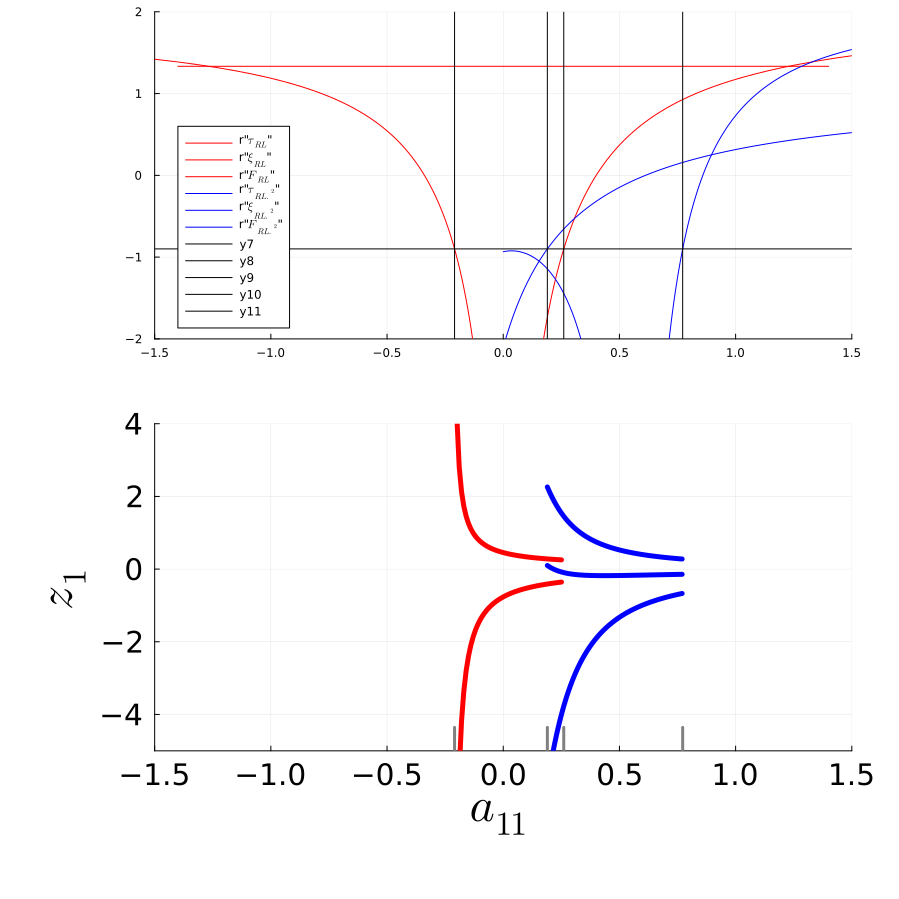

In [12]:
plot(Plot1_005,hi,layout=(2,1),size=(900,900))
#savefig("combined.svg")

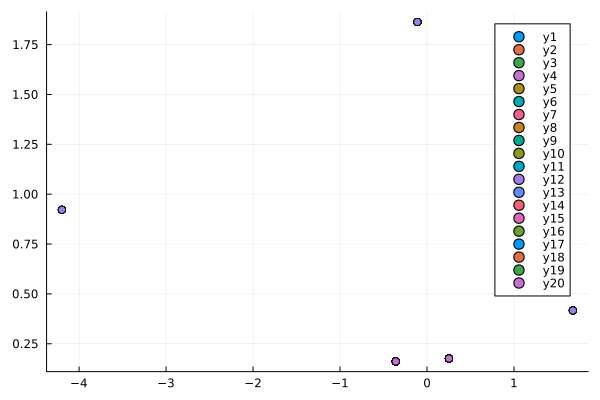

┌ Warning: Keyword argument markerstrokestyle not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotat

In [13]:
#state space in multistability region
A_left = [0.253 a12; a21 a22]#
f=plot()
for init=1:20
    time_series = generate_time_series(z -> step(z, h, A_left, [-2.83 a12+w12; a21+w21 a22]),  rand(Uniform(-2,2),2),100000)
    scatter!(f,[vec[1] for vec in time_series[end-10:end]],[vec[2] for vec in time_series[end-10:end]],marker=:dot)
    traj= time_series[end-10:end]
    points= unique(round.([vec[1] for vec in traj],digits=3))

end
display(f)

In [14]:
# Define the range of x and y values
x_range =  -5:0.01:2
y_range = -0.5:0.01:2

# Create a grid using these ranges
grid = [(x, y) for x in x_range, y in y_range]

# Evaluate the function on the grid

function_values = transpose([0.3>round.(generate_time_series(z -> step(z, h, A_left, [-2.83 a12+w12; a21+w21 a22]),  [x,y],10000)[end],digits=2)[2] for (x, y) in grid])


251×701 transpose(::Matrix{Bool}) with eltype Bool:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱     ⋮              ⋮              ⋮
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1 

In [15]:
time_series = generate_time_series(z -> step(z, h, A_left, A_right),  rand(Uniform(-2,2),2),100000)[end-4:end]

5-element Vector{Vector}:
 [-0.4458822239280624, 0.36445004934751624]
 [0.3927518368242132, 0.2512428994407282]
 [-0.4458822239280624, 0.36445004934751624]
 [0.3927518368242132, 0.2512428994407282]
 [-0.4458822239280624, 0.36445004934751624]

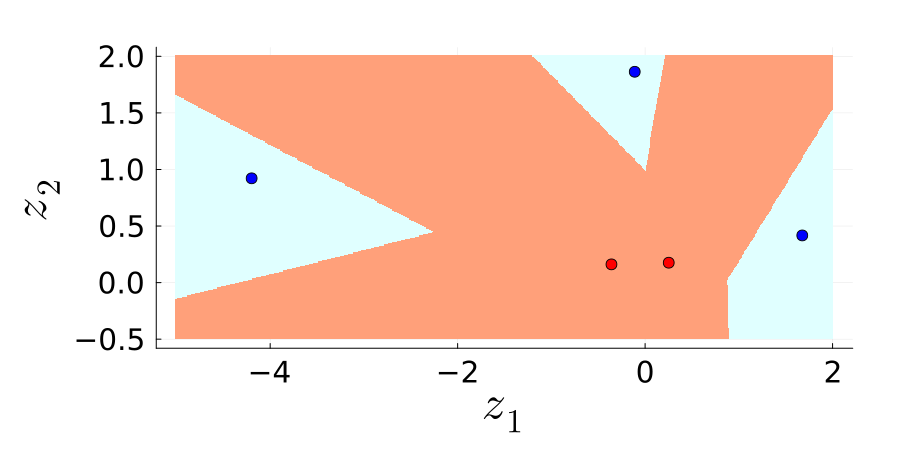

In [16]:
#cgrad([:orange, :blue], [0.1, 0.3, 0.8])
#c=cgrad([:lightcyan,:lightsalmon],[0,1,1])
custom_colormap = palette([:lightcyan,:lightsalmon], 2)
f=heatmap(x_range,y_range,function_values, c=custom_colormap, xlabel=L"z_1", ylabel=L"z_2",legend=false,colorbar=false,margin=10Plots.mm,size=(900,450),xtickfont=font(20),  font_family="sans-serif", ytickfont=font(20),xguidefontsize=32,yguidefontsize=32,legendfont=font(26))
A_left = [0.253 a12; a21 a22]#

scatter!(f,[-0.3589972910936986,0.252183151016356],[0.16126183207882722,0.1758512828532449],marker=:dot,color="red",markersize=6)
scatter!(f,[1.6767632503058343,-4.197697610501792,-0.11060371776187608],[0.4169279848296477, 0.9217672221188467,  1.8634324886244862],marker=:dot,color="blue",markersize=6)

savefig("state_space.png")

display(f)